In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [14]:
tiempo_inicio = time()
today = f'[{datetime.today().strftime("%Y-%m-%d %H:%M:%S")}]'
print(f'{today} Comienzo del preprocesamiento de datos')

[2023-04-02 23:17:25] Comienzo del preprocesamiento de datos


In [15]:
# Variables Globales
PATH = os.getcwd()
AUX_FOLDER = 'aux_file'
INPUT_FILENAME = 'dataset_validado.xlsx'
OUTPUT_FILENAME = 'dataset_modelo.xlsx'

In [16]:
# Cargo los datos
df = pd.read_excel(os.path.join(PATH, AUX_FOLDER, INPUT_FILENAME))

In [17]:
df.head()

,Fecha,Area,Habitaciones,Antiguedad,Precio
0,2014-10-14,176,2,94,369559.122287
1,2012-09-14,192,4,75,488538.922599
2,2017-10-05,172,3,85,386920.699242
3,2019-07-13,111,5,33,338081.475487
4,2008-08-24,106,1,23,285037.573300


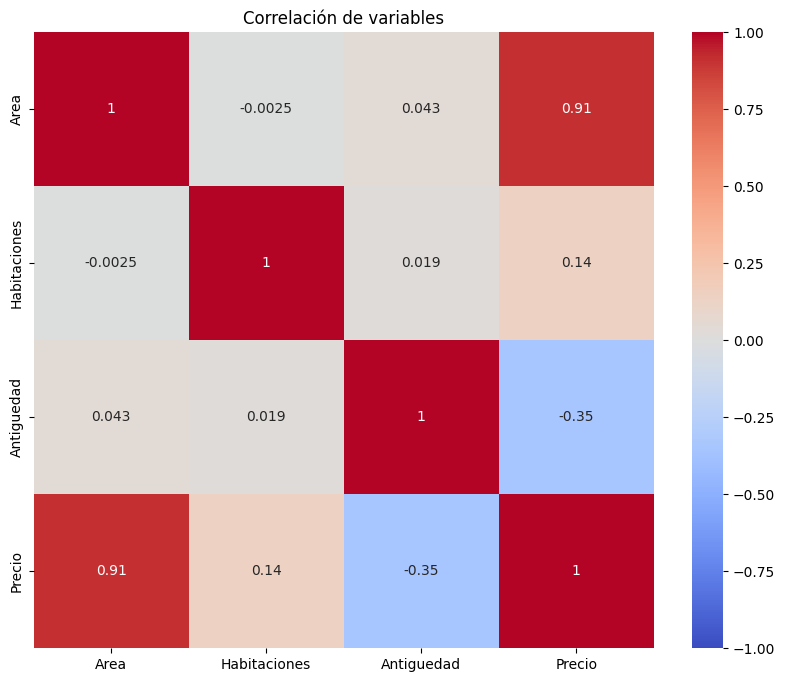

In [18]:
# Calcular la matriz de correlación
corr_matrix = df.drop('Fecha', axis=1).corr()

# Crear el gráfico de correlación tipo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título y mostrar el gráfico
plt.title('Correlación de variables')
plt.show()

In [19]:
# Preprocesamiento
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day
df.drop('Fecha', axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Area', 'Habitaciones', 'Antiguedad']])
df_scaled = pd.DataFrame(scaled_data, columns=['Area', 'Habitaciones', 'Antiguedad'])
df[['Area', 'Habitaciones', 'Antiguedad']] = df_scaled

In [20]:
df.head()

,Area,Habitaciones,Antiguedad,Precio,Año,Mes,Dia
0,1.078642,-0.661614,1.602203,369559.122287,2014,10,14
1,1.442142,0.776677,0.917070,488538.922599,2012,9,14
2,0.987767,0.057532,1.277666,386920.699242,2017,10,5
3,-0.398078,1.495822,-0.597437,338081.475487,2019,7,13
4,-0.511672,-1.380759,-0.958033,285037.573300,2008,8,24


In [21]:
media = scaler.mean_
desv_estandar = scaler.scale_
df_scaler = pd.DataFrame({'Media':media, 'STD': desv_estandar})

In [22]:
df.to_excel(os.path.join(PATH, AUX_FOLDER, OUTPUT_FILENAME), index=False)
df_scaler.to_excel(os.path.join(PATH, AUX_FOLDER, 'scaler.xlsx'), index=False)
tiempo_fin = time()
duracion = tiempo_fin - tiempo_inicio
horas, remainder = divmod(int(duracion), 3600)
minutos, segundos = divmod(remainder, 60)
print(f'{today} El tiempo transcurrido de ejecucion fue: {horas:02d}h {minutos:02d}m {segundos:02d}s')

[2023-04-02 23:17:25] El tiempo transcurrido de ejecucion fue: 00h 00m 01s
